### Examples for accessible plots using matplotlib
This notebook is intended as basic examples for how to load colorblind-friendly color palettes, examples for linestyle/markers, and colorscales which have a gradient that is visible even if someone cannot see the color itself. 
There are many ways to make accessible plots, and this represents only a few examples intended as a jumping-off point for making accessible plots.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#choose a colorblind friendly palette
import matplotlib.style as style
style.use('seaborn-colorblind')

#another option in matplotlib:
#style.use('tableau-colorblind10')

#Sometimes the above only load 6 colors. If you want more, you can do 
#(note that seaborn may need to be pip installed to use this)
import seaborn as sns
sns.set_palette('colorblind',10)
#And you can show/get the hex codes by:
print('Colorblind palette with 10 colors:')
print(sns.color_palette('colorblind',10).as_hex())

#here, we'll choose only 6:
print('Colorblind palette with 6 colors:')
sns.set_palette('colorblind',6)
print(sns.color_palette('colorblind',6).as_hex())

Colorblind palette with 10 colors:
['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']
Colorblind palette with 6 colors:
['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161']


In [9]:
#increase the font size on plots: there are several ways to do this
#the methods change values globally (aka font size for all text on all plots)
mpl.rcParams.update({'font.size': 12})

#an easy way to change the font style
mpl.rcParams.update({'font.family':'sans-serif','font.sans-serif':'Verdana'})

#you can also change some plotting defaults
mpl.rcParams.update({'axes.titlesize': 24,
                    'axes.labelsize': 20,
                    'lines.linewidth': 2, # this can also easily be changed in plt.plot, with the lw keyword
                    'lines.markersize':10, #same here, with the 's' keyword in plt.plot
                    # these last two change the size of the numbers on your axes
                    # you could do the same with "plt.tick_params(labelsize = 16)""
                    'xtick.labelsize': 16,
                    'ytick.labelsize':16,
                    })

mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter

## Linestyles and markers
Often a great way to make a plot accessible is by choosing different linestyles and markers for data, so that lines and points are distinguishable in both a legend and on the plot itself.

/home/jthwaites/.venvs/fra_env/lib/python3.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


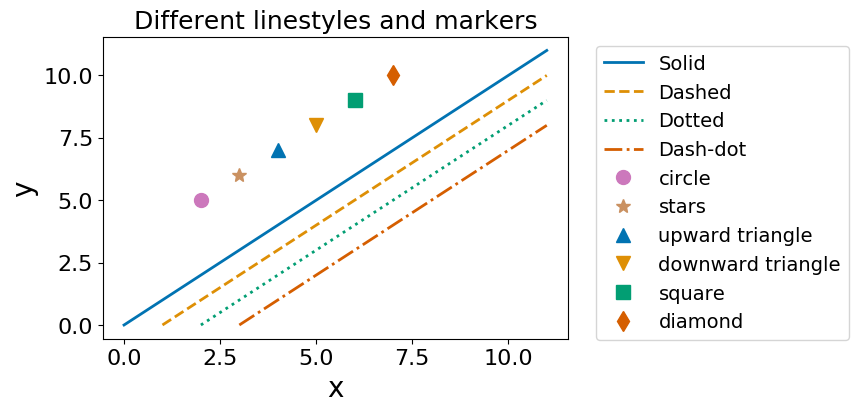

In [10]:
fig, ax = plt.subplots(dpi=100)
#lines
#some others can also be parametized: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
plt.plot(np.arange(0,12),np.arange(0,12), ls='solid', label='Solid') #solid
plt.plot(np.arange(1,12),np.arange(0,11), ls='dashed', label= 'Dashed') #dashed
plt.plot(np.arange(2,12),np.arange(0,10), ls='dotted', label= 'Dotted') #dotted 
plt.plot(np.arange(3,12),np.arange(0,9), ls='dashdot', label='Dash-dot') #dashed-dotted

#points
#many more here: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
plt.plot(2,5,'o', label='circle')
plt.plot(3,6, '*', label='stars')
plt.plot(4,7, '^', label='upward triangle')
plt.plot(5,8,'v', label='downward triangle') 
plt.plot(6,9, 's', label='square')
plt.plot(7,10, 'd', label='diamond')

plt.title('Different linestyles and markers', fontsize=18)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=14)
plt.show()

## Colormaps
Sometimes, a color map is needed. In this case, it is best to use those that matplotlib defines as "Sequential": their lightness increases monotonically. These are maps that are a single color ("Blues") or a few colors ("YlOrBr"), or perceptually uniform ones such as those below.

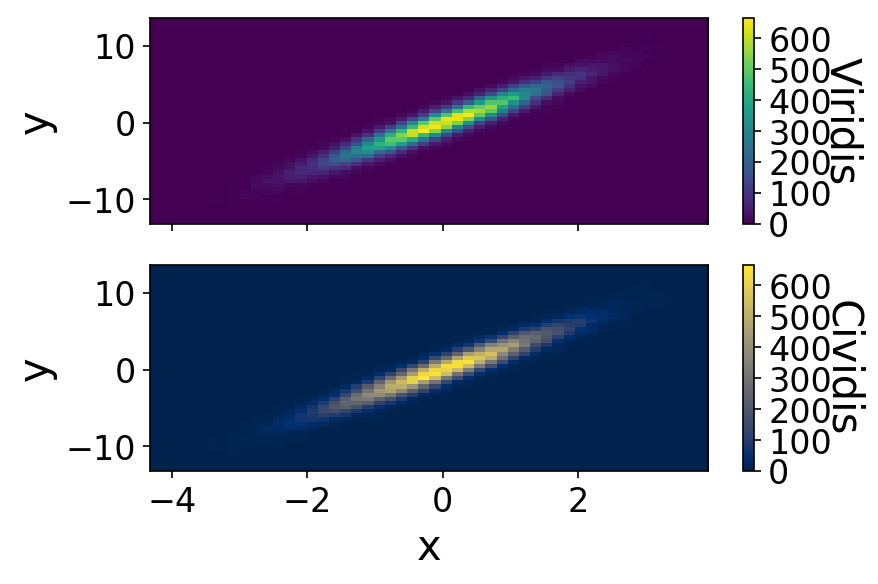

In [11]:
x = np.random.normal(size=50000)
y = x * 3 + np.random.normal(size=50000)

fig, ax = plt.subplots(2, sharex=True,dpi=150)

#Viridis colormap
h1=ax[0].hist2d(x, y, bins=(50, 50), cmap='viridis')
cbar1=plt.colorbar(h1[3], ax=ax[0])
cbar1.set_label('Viridis', rotation=270, labelpad=15)
ax[0].set_ylabel('y')

#Cividis colormap
h2=ax[1].hist2d(x, y, bins=(50, 50), cmap='cividis')
cbar2=plt.colorbar(h2[3], ax=ax[1])
cbar2.set_label('Cividis', rotation=270, labelpad=15)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.show()

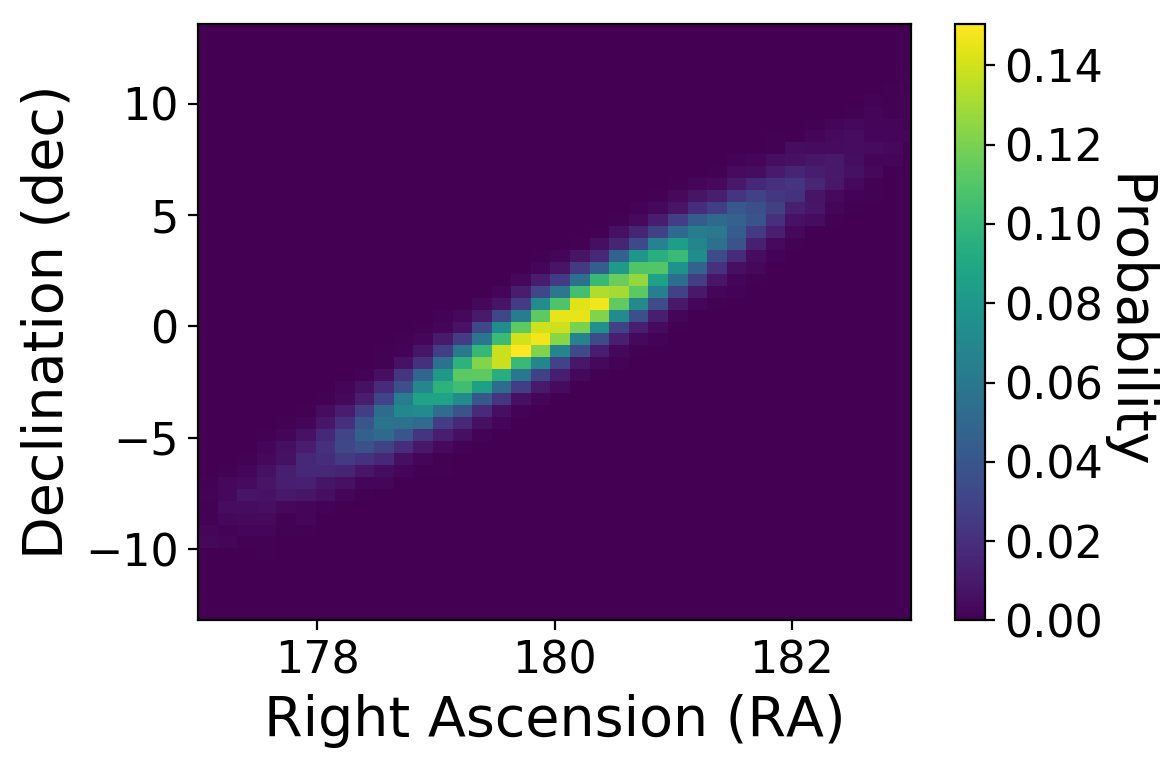

In [20]:
# same colormap and x-y fake generated data as above, now
# as if this is a probability map on the sky
fig, ax = plt.subplots(dpi=200)

#RA is [0,360] degrees, dec [-90,90]
h1=ax.hist2d(x+180, y, bins=(50, 50), normed = True, cmap='viridis')
cbar1=plt.colorbar(h1[3], ax=ax)
cbar1.set_label('Probability', rotation=270, labelpad=18)
ax.set_xlim([177,183])
ax.set_xlabel('Right Ascension (RA)')
ax.set_ylabel('Declination (dec)')
plt.tight_layout()
plt.show()